In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_orders=pd.read_csv('challenge_orders.csv')
df_analytics=pd.read_csv('challenge_analytics.csv')


In [6]:
df_analytics.head()

,Unnamed: 0,TIMESTAMP,SESSION_ID,EVENT_TYPE,PLATFORM,EVENT_SOURCE,KEYWORD,OBJ_ID,obsf_user_id,OBSF_USER_ID,OBSF_STORE_TYPE
0,0,2019-04-16 17:23:54.892000+00:00,1.555435e+12,view_store_type,Android,MARKET,NaN,NaN,0,0,0
1,1,2019-04-15 21:08:01.644000-07:00,1.555362e+12,view_product_description,Android,LOCAL_SEARCH,NaN,5cb4f279ee88fc0015b411d6,1,1,1
2,2,2019-04-16 20:48:59.590000-07:00,1.555448e+12,local_search,iOS,TYPED,zop,NaN,2,2,2
3,3,2019-04-16 01:11:25.613000-07:00,1.555377e+12,add_to_cart,iOS,VIEW_PRODUCT_DESCRIPTION,NaN,NaN,3,3,3
4,4,2019-04-15 22:26:03.508000-07:00,1.555367e+12,local_search,iOS,TYPED,lentejas,NaN,4,4,1


In [4]:
df_analytics.corr()

C:\Users\David\AppData\Local\Temp\ipykernel_32352\3798085954.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_analytics.corr()


,Unnamed: 0,SESSION_ID,obsf_user_id,OBSF_USER_ID,OBSF_STORE_TYPE
Unnamed: 0,1.000000,-0.000638,0.070689,0.070689,-0.000976
SESSION_ID,-0.000638,1.000000,-0.000153,-0.000153,-0.004430
obsf_user_id,0.070689,-0.000153,1.000000,1.000000,0.053378
OBSF_USER_ID,0.070689,-0.000153,1.000000,1.000000,0.053378
OBSF_STORE_TYPE,-0.000976,-0.004430,0.053378,0.053378,1.000000


In [5]:
df_analytics=df_analytics.drop_duplicates()

In [6]:
correlation = df_analytics['OBSF_USER_ID'].corr(df_analytics['obsf_user_id'])
correlation

1.0

La correlación es uno podemos quitar esta columna, ya que tenemos los mismos datos en obsf_user_id

In [7]:
df_analytics = df_analytics.drop('OBSF_USER_ID', axis=1)


In [8]:
df_analytics.head()

,Unnamed: 0,TIMESTAMP,SESSION_ID,EVENT_TYPE,PLATFORM,EVENT_SOURCE,KEYWORD,OBJ_ID,obsf_user_id,OBSF_STORE_TYPE
0,0,2019-04-16 17:23:54.892000+00:00,1.555435e+12,view_store_type,Android,MARKET,NaN,NaN,0,0
1,1,2019-04-15 21:08:01.644000-07:00,1.555362e+12,view_product_description,Android,LOCAL_SEARCH,NaN,5cb4f279ee88fc0015b411d6,1,1
2,2,2019-04-16 20:48:59.590000-07:00,1.555448e+12,local_search,iOS,TYPED,zop,NaN,2,2
3,3,2019-04-16 01:11:25.613000-07:00,1.555377e+12,add_to_cart,iOS,VIEW_PRODUCT_DESCRIPTION,NaN,NaN,3,3
4,4,2019-04-15 22:26:03.508000-07:00,1.555367e+12,local_search,iOS,TYPED,lentejas,NaN,4,1


### Basic Statistics


In [12]:
df_analytics.describe()

,Unnamed: 0,SESSION_ID,obsf_user_id,OBSF_STORE_TYPE
count,489258.000000,4.892580e+05,489258.000000,489258.000000
mean,244628.500000,1.555390e+12,7811.272829,9.248756
std,141236.763338,5.165779e+07,6825.181830,11.641779
min,0.000000,1.554602e+12,0.000000,0.000000
25%,122314.250000,1.555355e+12,2283.000000,1.000000
50%,244628.500000,1.555376e+12,5740.000000,6.000000
75%,366942.750000,1.555440e+12,11661.000000,13.000000
max,489257.000000,1.556510e+12,29518.000000,142.000000


## distribution of Categorical Variables:

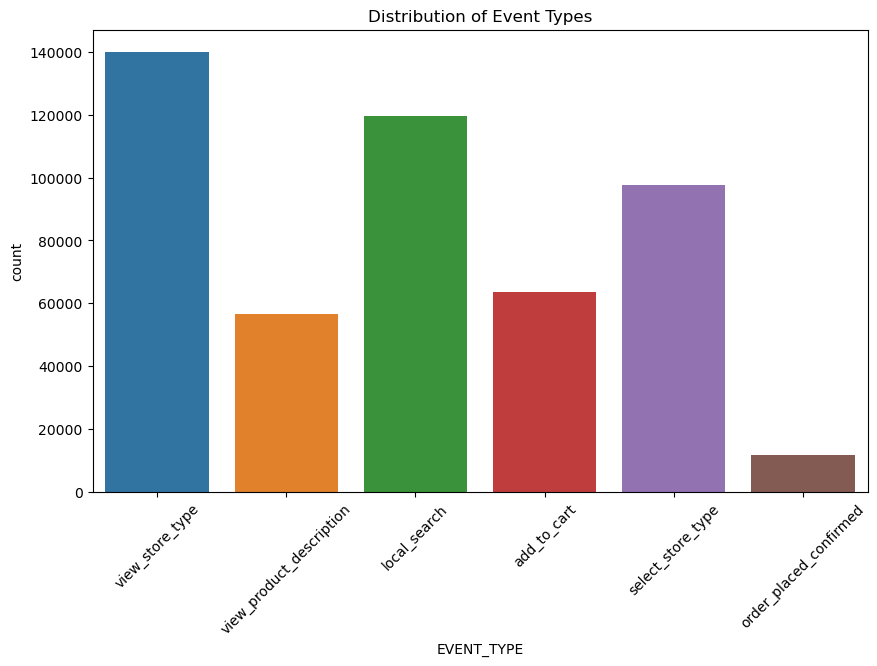

In [13]:


# Plot distribution of event types
plt.figure(figsize=(10, 6))
sns.countplot(data=df_analytics, x='EVENT_TYPE')
plt.xticks(rotation=45)
plt.title('Distribution of Event Types')
plt.show()

In [72]:

df_analytics=pd.read_csv('challenge_analytics.csv')

event_type_counts = df_analytics['EVENT_TYPE'].value_counts()
print(event_type_counts)

view_store_type             140139
local_search                119523
select_store_type            97821
add_to_cart                  63448
view_product_description     56725
order_placed_confirmed       11602
Name: EVENT_TYPE, dtype: int64


In [16]:
df_analytics=pd.read_csv('challenge_analytics.csv')
df_analytics['TIMESTAMP'] = pd.to_datetime(df_analytics['TIMESTAMP'], utc=True)
df_analytics.set_index('TIMESTAMP', inplace=True)


C:\Users\David\AppData\Local\Temp\ipykernel_4940\3121642100.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for day, count in daily_event_counts.iteritems():
C:\Users\David\AppData\Local\Temp\ipykernel_4940\3121642100.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  events_per_hour = df_analytics[day.strftime('%Y-%m-%d')].resample('H')['EVENT_TYPE'].count()


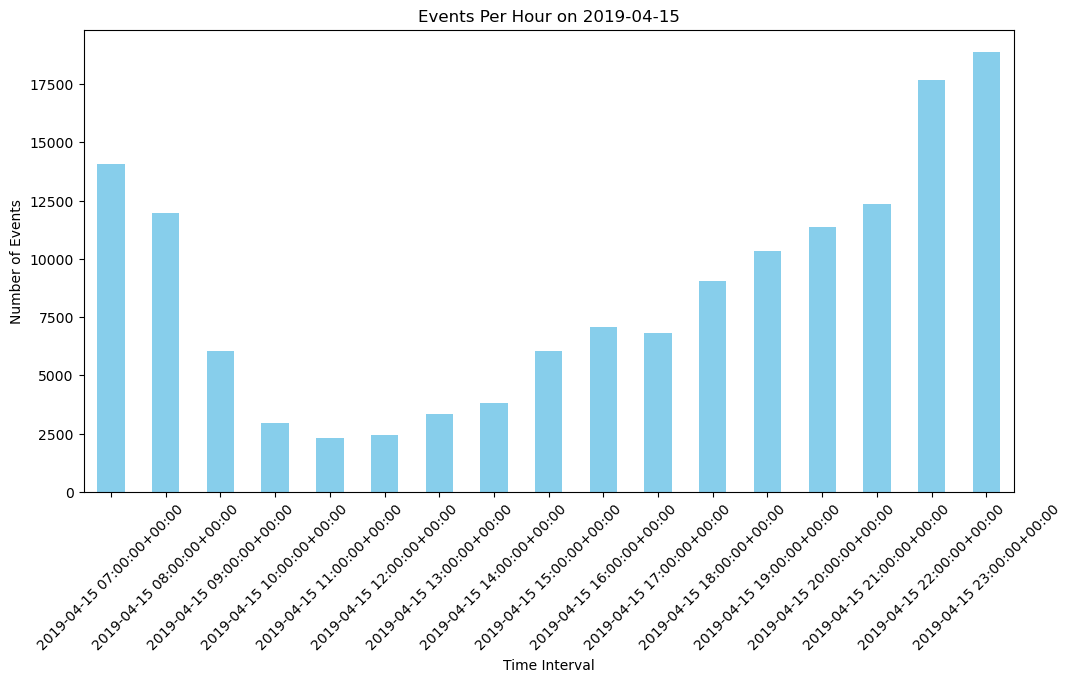

C:\Users\David\AppData\Local\Temp\ipykernel_4940\3121642100.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  events_per_hour = df_analytics[day.strftime('%Y-%m-%d')].resample('H')['EVENT_TYPE'].count()


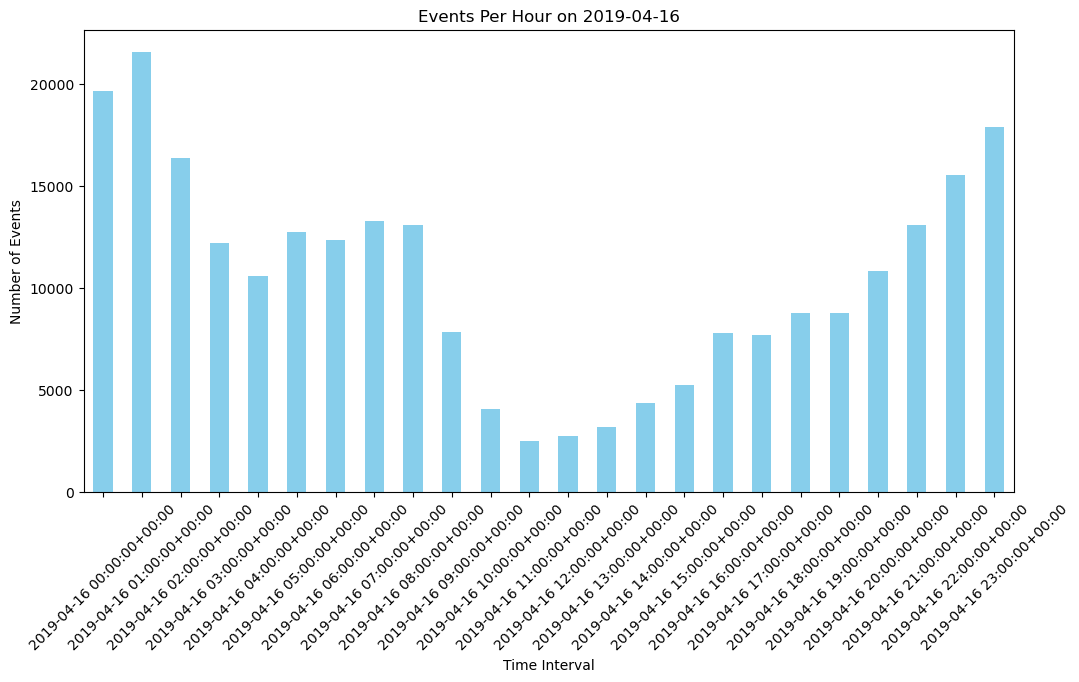

C:\Users\David\AppData\Local\Temp\ipykernel_4940\3121642100.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  events_per_hour = df_analytics[day.strftime('%Y-%m-%d')].resample('H')['EVENT_TYPE'].count()


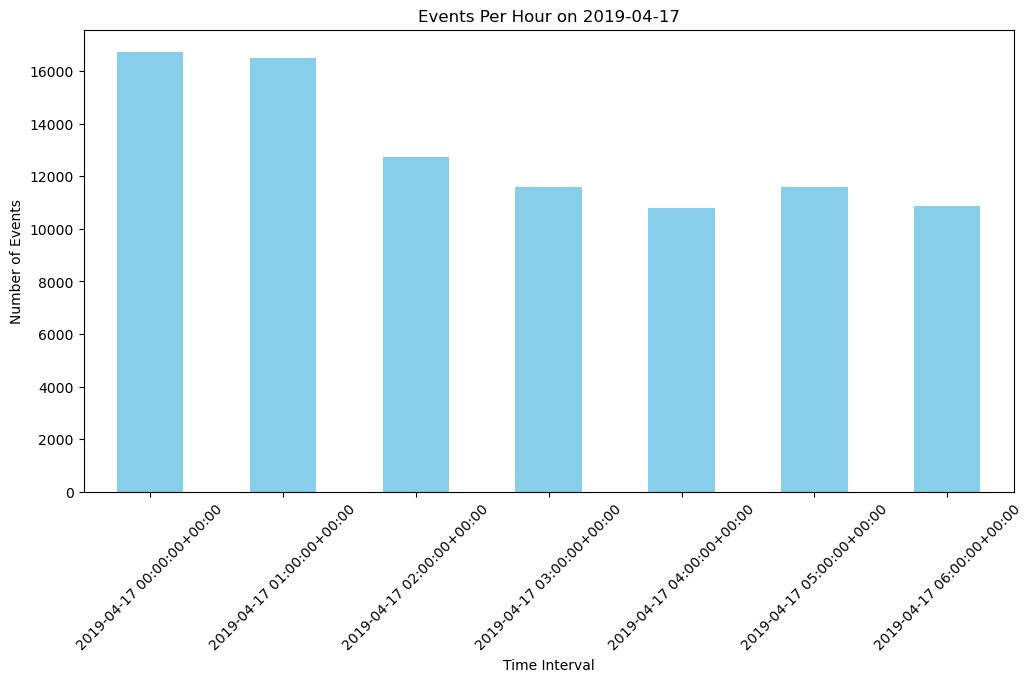

In [17]:
daily_event_counts = df_analytics.resample('D')['EVENT_TYPE'].count()

# Iterate through each day and plot events per hour
for day, count in daily_event_counts.iteritems():
    events_per_hour = df_analytics[day.strftime('%Y-%m-%d')].resample('H')['EVENT_TYPE'].count()

    plt.figure(figsize=(12, 6))
    events_per_hour.plot(kind='bar', color='skyblue')
    plt.title(f'Events Per Hour on {day.date()}')
    plt.xlabel('Time Interval')
    plt.ylabel('Number of Events')
    plt.xticks(rotation=45)
    plt.show()

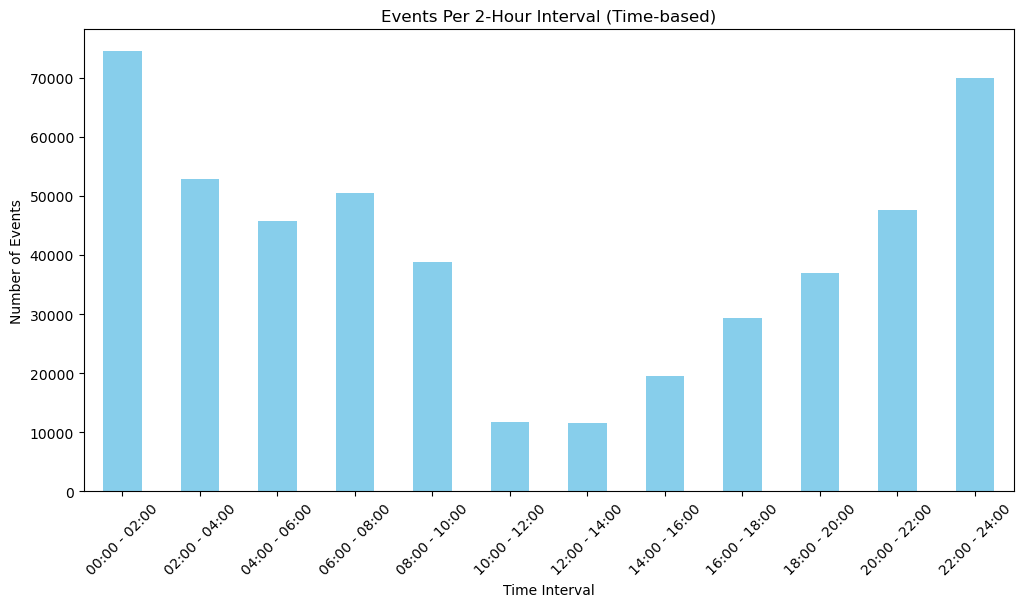

In [7]:
df_analytics['Time'] = df_analytics.index.time
time_intervals = df_analytics['Time'].apply(
    lambda x: (x.hour * 60 + x.minute) // 120
)
event_counts = df_analytics.groupby(time_intervals).size()

# Define time interval labels
time_interval_labels = [f'{i*2:02}:00 - {(i+1)*2:02}:00' for i in event_counts.index]

# Plot events per 2-hour interval
plt.figure(figsize=(12, 6))
event_counts.plot(kind='bar', color='skyblue')
plt.title('Events Per 2-Hour Interval (Time-based)')
plt.xlabel('Time Interval')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ticks=event_counts.index, labels=time_interval_labels)
plt.show()

### Platform


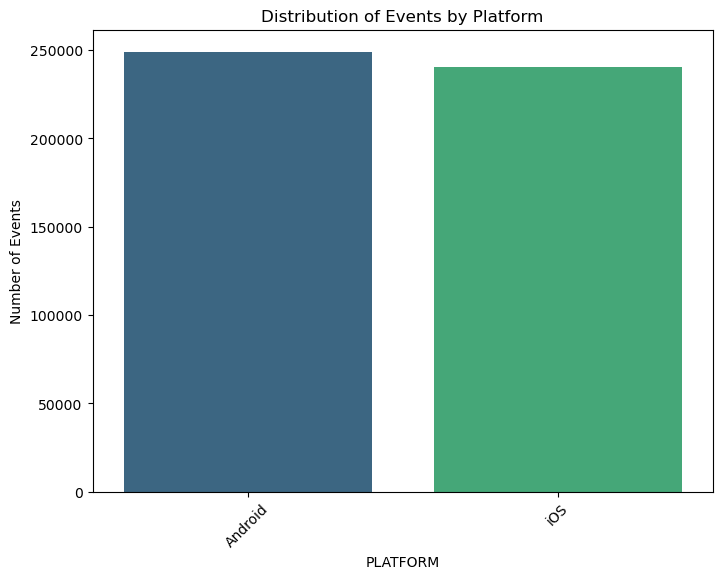

In [11]:
platform_counts = df_analytics['PLATFORM'].value_counts()

# Plot platform distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='viridis')
plt.title('Distribution of Events by Platform')
plt.xlabel('PLATFORM')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()

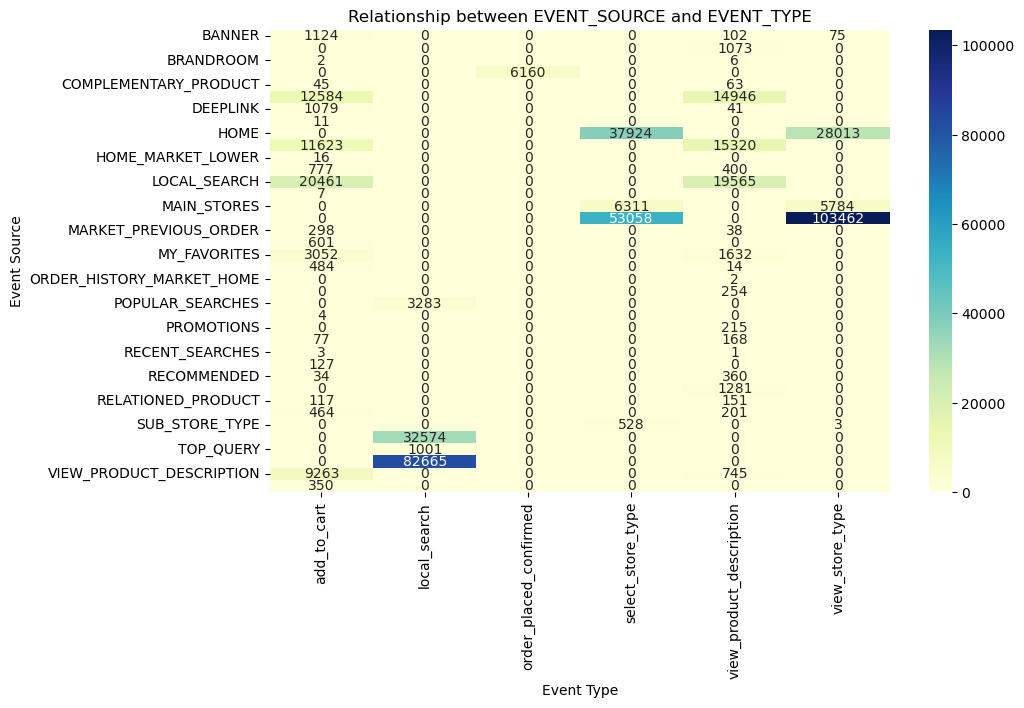

In [22]:
pivot_table = df_analytics.pivot_table(index='EVENT_SOURCE', columns='EVENT_TYPE', values='PLATFORM', aggfunc='count', fill_value=0)

# Plotting a heatmap to show the relationship numerically with units
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')  # Using 'd' for integer formatting
plt.title('Relationship between EVENT_SOURCE and EVENT_TYPE')
plt.xlabel('Event Type')
plt.ylabel('Event Source')
plt.show()

In [20]:
pivot_table 

EVENT_TYPE,add_to_cart,local_search,order_placed_confirmed,select_store_type,view_product_description,view_store_type
EVENT_SOURCE,,,,,,
BANNER,1124.0,NaN,NaN,NaN,102.0,75.0
BASKET,NaN,NaN,NaN,NaN,1073.0,NaN
BRANDROOM,2.0,NaN,NaN,NaN,6.0,NaN
CHECKOUT,NaN,NaN,6160.0,NaN,NaN,NaN
COMPLEMENTARY_PRODUCT,45.0,NaN,NaN,NaN,63.0,NaN
CORRIDOR_LANE,12584.0,NaN,NaN,NaN,14946.0,NaN
DEEPLINK,1079.0,NaN,NaN,NaN,41.0,NaN
FAVORITES_TAB,11.0,NaN,NaN,NaN,NaN,NaN
HOME,NaN,NaN,NaN,37924.0,NaN,28013.0


## Most common keywords

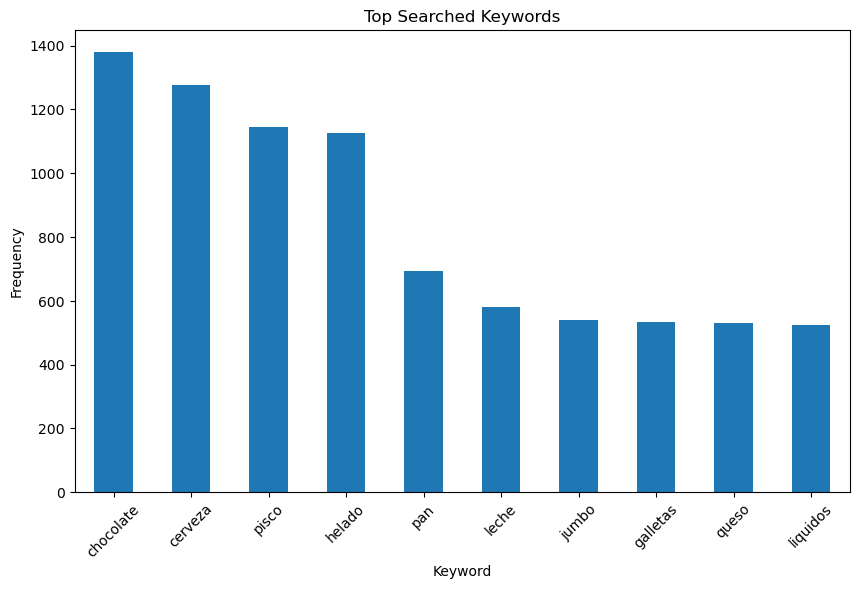

In [15]:
# Plot top keywords
plt.figure(figsize=(10, 6))
df_analytics['KEYWORD'].value_counts().head(10).plot(kind='bar')
plt.title('Top Searched Keywords')
plt.ylabel('Frequency')
plt.xlabel('Keyword')
plt.xticks(rotation=45)
plt.show()

## Correlación entre variables, vemos que no hay ninguna que se correlacione linealmente

In [9]:
df_analytics.corr()

C:\Users\David\AppData\Local\Temp\ipykernel_32352\3798085954.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_analytics.corr()


,Unnamed: 0,SESSION_ID,obsf_user_id,OBSF_STORE_TYPE
Unnamed: 0,1.000000,-0.000638,0.070689,-0.000976
SESSION_ID,-0.000638,1.000000,-0.000153,-0.004430
obsf_user_id,0.070689,-0.000153,1.000000,0.053378
OBSF_STORE_TYPE,-0.000976,-0.004430,0.053378,1.000000


## Distribución de los datos numericos


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'SESSION_ID'}>],
       [<Axes: title={'center': 'obsf_user_id'}>,
        <Axes: title={'center': 'OBSF_USER_ID'}>],
       [<Axes: title={'center': 'OBSF_STORE_TYPE'}>, <Axes: >]],
      dtype=object)

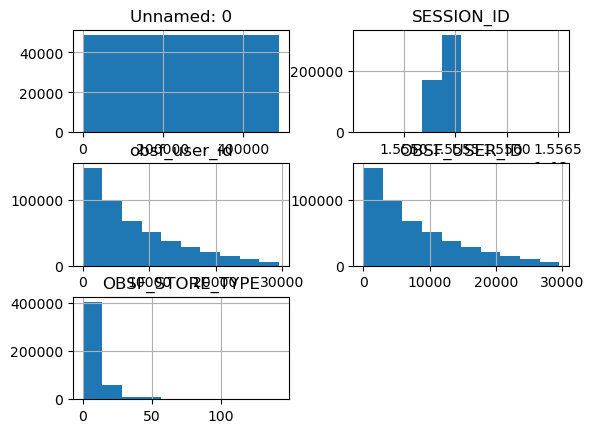

In [23]:
df_analytics.hist()

## Orders

In [64]:
df_orders.head()

,Unnamed: 0,ORDER_ID,PRODUCT_ID,PAYMENT_METHOD,TOTAL_VALUE,CREATED_AT,STORE_TO_USER_DISTANCE,OBSF_USER_ID,OBSF_STORE_TYPE
0,0,35394843,2090144731,cash,1940.0,13:40:19,488.0,8540,5
1,1,35419116,2090144731,cc,8900.0,20:54:24,4761.0,3990,14
2,2,35404241,2090144731,cash,150.0,21:12:49,3141.0,19052,5
3,3,35405366,2090144731,cash,400.0,21:58:28,3070.0,16978,14
4,4,35406544,2090144731,cash,9580.0,23:36:01,1210.0,9521,5


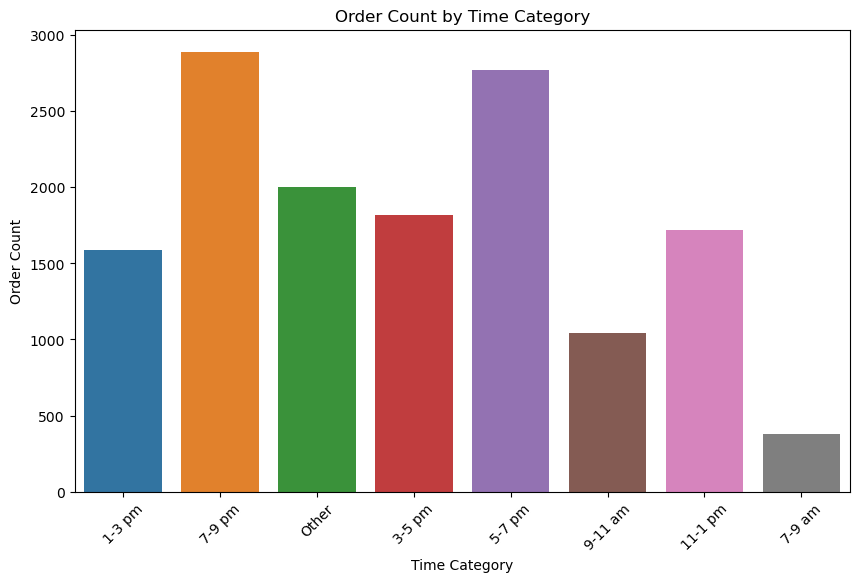

In [26]:
df_orders = pd.read_csv('challenge_orders.csv')

df_orders['CREATED_AT'] = pd.to_datetime(df_orders['CREATED_AT'])

# Extract only the time component from 'CREATED_AT'
df_orders['TIME'] = df_orders['CREATED_AT'].dt.time

# Define time ranges
time_ranges = [
    (pd.to_datetime('07:00:00').time(), pd.to_datetime('09:00:00').time(), '7-9 am'),
    (pd.to_datetime('09:00:00').time(), pd.to_datetime('11:00:00').time(), '9-11 am'),
    (pd.to_datetime('11:00:00').time(), pd.to_datetime('13:00:00').time(), '11-1 pm'),
    (pd.to_datetime('13:00:00').time(), pd.to_datetime('15:00:00').time(), '1-3 pm'),
    (pd.to_datetime('15:00:00').time(), pd.to_datetime('17:00:00').time(), '3-5 pm'),
    (pd.to_datetime('17:00:00').time(), pd.to_datetime('19:00:00').time(), '5-7 pm'),
    (pd.to_datetime('19:00:00').time(), pd.to_datetime('21:00:00').time(), '7-9 pm')
]

# Function to assign time category
def assign_time_category(time):
    for start, end, category in time_ranges:
        if start <= time < end:
            return category
    return 'Other'

# Apply the function to create the new categorical variable
df_orders['TIME_CATEGORY'] = df_orders['TIME'].apply(assign_time_category)

# Plot the bar plot of the new time category variable
plt.figure(figsize=(10, 6))
sns.countplot(data=df_orders, x='TIME_CATEGORY')
plt.title('Order Count by Time Category')
plt.xlabel('Time Category')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.show()

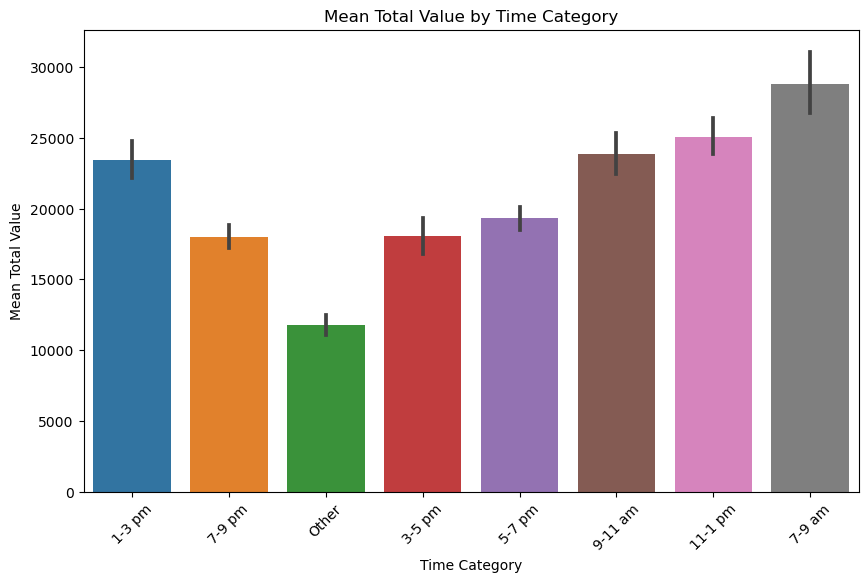

In [48]:
df_orders['TIME_CATEGORY'] = df_orders['TIME'].apply(assign_time_category)

# Plot the bar plot of mean 'TOTAL_VALUE' for each time category
plt.figure(figsize=(10, 6))
sns.barplot(data=df_orders, x='TIME_CATEGORY', y='TOTAL_VALUE', estimator='mean')
plt.title('Mean Total Value by Time Category')
plt.xlabel('Time Category')
plt.ylabel('Mean Total Value')
plt.xticks(rotation=45)
plt.show()

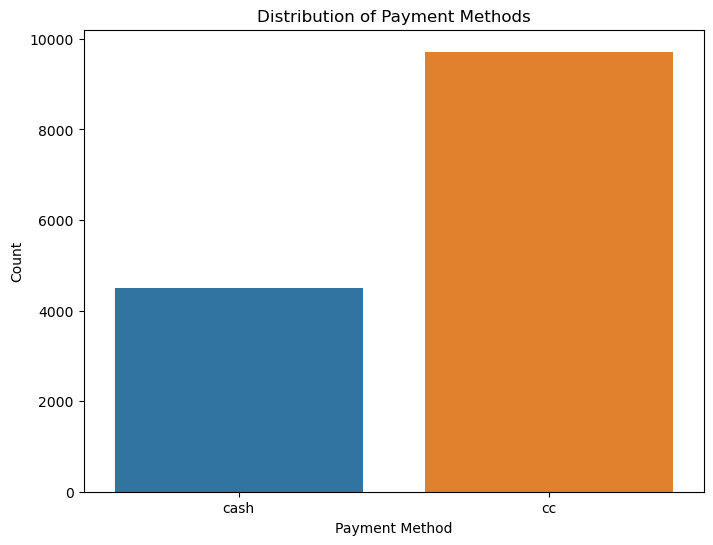

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_orders is your DataFrame
df_orders = pd.read_csv('challenge_orders.csv')

# Convert 'CREATED_AT' to datetime
df_orders['CREATED_AT'] = pd.to_datetime(df_orders['CREATED_AT'])

# Extract only the time component from 'CREATED_AT'
df_orders['CREATED_AT'] = df_orders['CREATED_AT'].dt.time

# Exploratory Analysis of 'PAYMENT_METHOD'
plt.figure(figsize=(8, 6))
sns.countplot(data=df_orders, x='PAYMENT_METHOD')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()


## Total Value


In [28]:
total_value_stats = df_orders['TOTAL_VALUE'].describe()
print(total_value_stats)

count     14210.000000
mean      19561.727682
std       24281.456732
min           0.000000
25%        2340.000000
50%       10880.000000
75%       28331.000000
max      157256.000000
Name: TOTAL_VALUE, dtype: float64


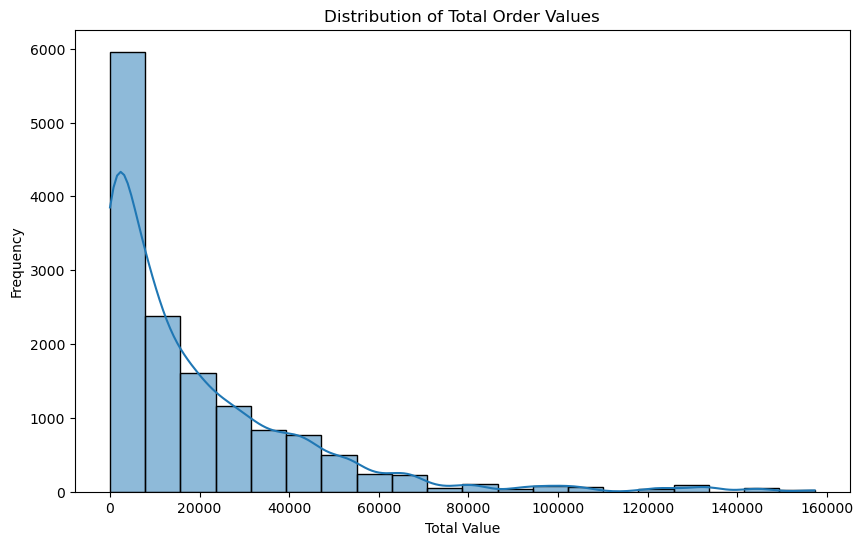

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_orders, x='TOTAL_VALUE', bins=20, kde=True)
plt.title('Distribution of Total Order Values')
plt.xlabel('Total Value')
plt.ylabel('Frequency')
plt.show()

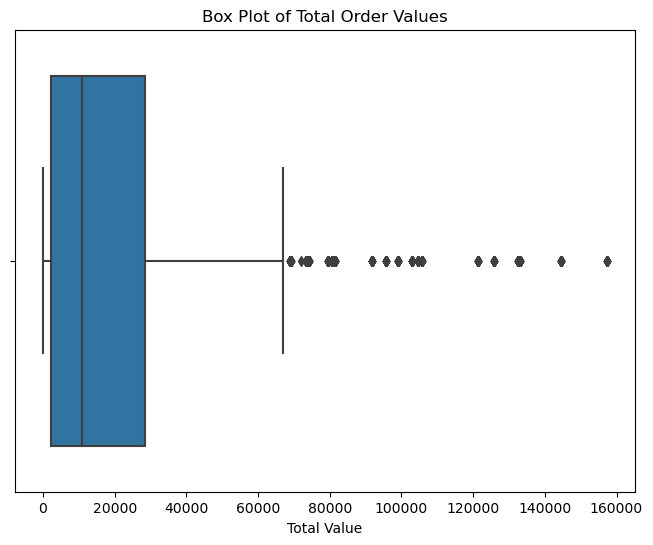

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_orders, x='TOTAL_VALUE')
plt.title('Box Plot of Total Order Values')
plt.xlabel('Total Value')
plt.show()

In [38]:

top_keywords = df_analytics[df_analytics['EVENT_TYPE'] == 'local_search']['KEYWORD'].value_counts()


) missing from current font.ython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)
E:\Apps\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128126 (\N{ALIEN MONSTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Apps\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128125 (\N{EXTRATERRESTRIAL ALIEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Apps\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Apps\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127849 (\N{DOUGHNUT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Apps\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127831 (\N{POULTRY LEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Apps\Lib\site-packages

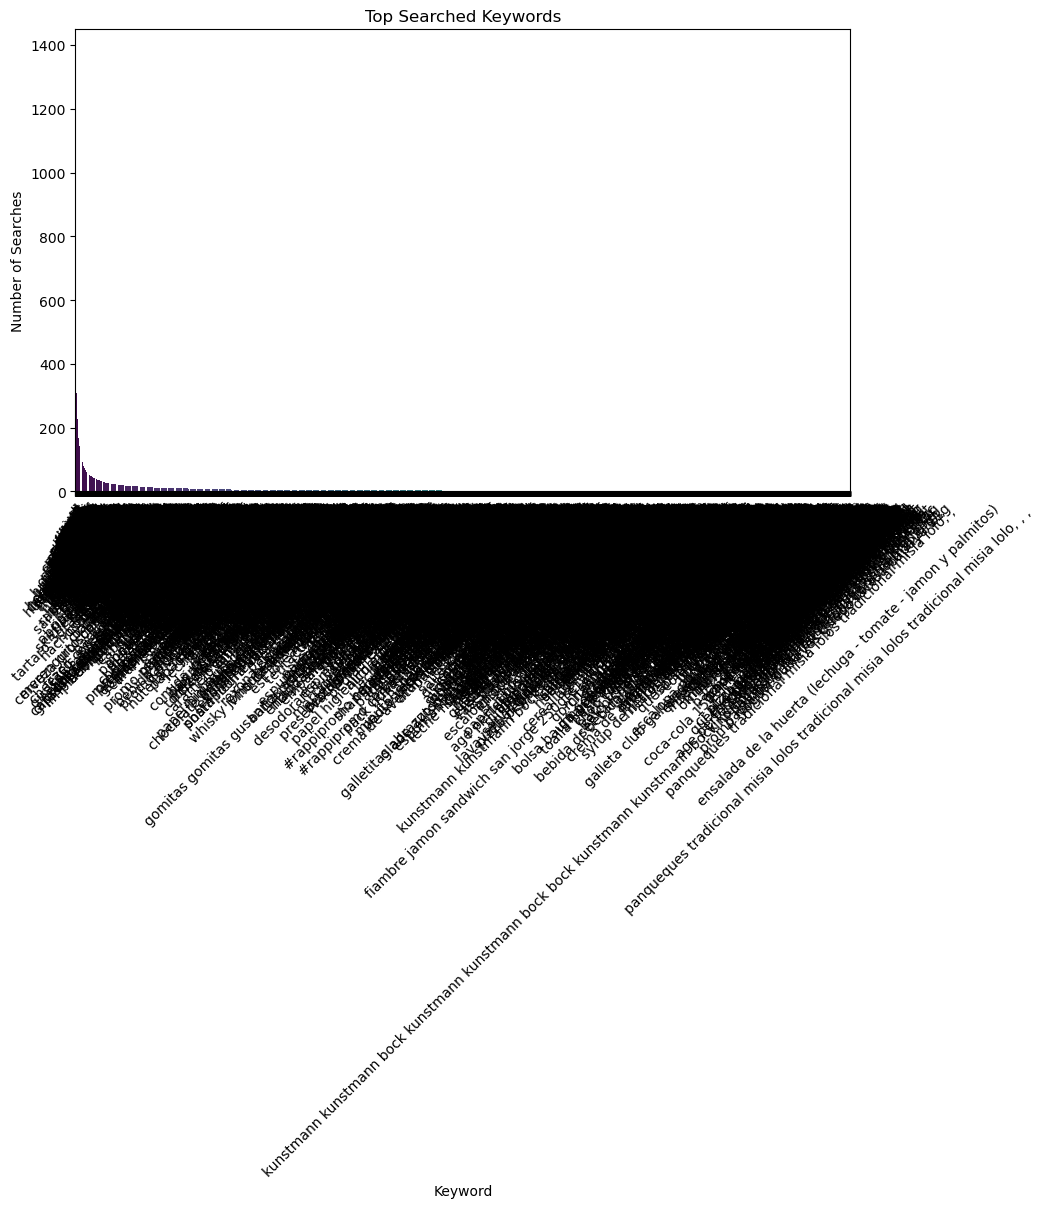

In [37]:

top_keywords = df_analytics[df_analytics['EVENT_TYPE'] == 'local_search']['KEYWORD'].value_counts()

# Plot the top searched keywords
plt.figure(figsize=(10, 6))
sns.barplot(x=top_keywords.index, y=top_keywords.values, palette='viridis')
plt.title('Top Searched Keywords')
plt.xlabel('Keyword')
plt.ylabel('Number of Searches')
plt.xticks(rotation=45)
plt.show()

E:\Apps\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


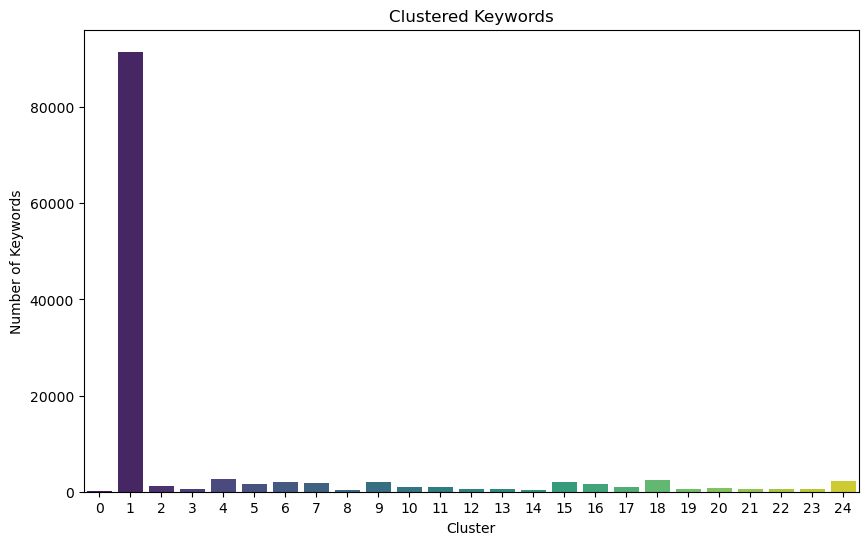

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Remove rows with missing keywords or replace with 'unknown'
df_analytics.dropna(subset=['KEYWORD'], inplace=True)

# Convert keywords to lowercase
df_analytics['KEYWORD'] = df_analytics['KEYWORD'].str.lower()

# Text preprocessing using TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_analytics['KEYWORD'])

# Perform KMeans clustering
num_clusters = 25  # You can adjust the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_analytics['Cluster'] = kmeans.fit_predict(X)

# Plot the clustered keywords
plt.figure(figsize=(10, 6))
sns.countplot(data=df_analytics, x='Cluster', palette='viridis')
plt.title('Clustered Keywords')
plt.xlabel('Cluster')
plt.ylabel('Number of Keywords')
plt.show()

In [45]:
cluster_1_keywords = df_analytics[df_analytics['Cluster'] == 1]['KEYWORD']

# Print the keywords in Cluster 1
for keyword in cluster_1_keywords:
    print(keyword)

zop
lentejas
saluda
cr nivea anti arrugas
triton
mantequilla
pure
galleta oreo, 
asmavent sf inhbuc 200ds, 
barcelo ron
caja te
marco polo papas
cafe
mix
huevitos
maizena maiz 10g
savory
repuesto venus
jumbo 
novafem jer.1
cereal, 
cereales
trioval
lasaña
ravioli
jug
far
pata dental
liqui
teclados
sahne nuss light
salanova
us
cumpleaños 
l
rabotril
jabon popeye
embarazo, 
johnny wa
cabrita dulce
base
vacuna
azucar
surtido marisco, 
whisk
repollo
pañales huggies ajuste perfecto
limpia vide
super 8
san
led
afeitador
kent blue
handroll
platanos
n
vitamin water
sta
glade
vaselina simonds purificada s/perf 110ml , 
acond famileand
cif antihonfo 
balla
palomitas
telepizza
kryspo
piedras
cheddar
o
pasteleria
mac
jugo natural 
marraqueta
litle cesars
cheeto mani
alcohol
sangu
off
viga
luso la
snicker
helado savory paleta mini kriko 6x50ml
levadura fresca
ñoquis italiana papa 50g
papaj
cataña caju
arepas
agua micelar, 
ok
nova
gamm
arena sanitaria
pallmall click
lomo
mcdonalds
pasta
cereal
tort

fernet branca 39g bot 750ccvao
kent  click
niño cereal
lipton
kfc
chai to
frutalista
chocolates sin azu
monster
tres
galletas
galleta oreo, 
marlboro, 
galletas
kento 
starb
manzana
lays
fresca
 sal lava vajilla
wasil poroto , 
minuto verde
cigarros
natur
pavo
cervez
chocolste, 
cachapa
mcdonalds
frutillas 
cocacola
pan lo castaños
papas
sushi
depilar
arroz
rusticas
ma
gomita
loncoleche chocolate sin lactosa
stella artois
neutrogena toner
salma
powerade
triton
toallistas humedas
aceituna
mantequillamani
redbull, 
calafate
levadura
promo
pis
agua micelar
lucky click
fideo integral
harina 
ecovida 
lider
jack daniel
santa isabel
jalea
torta de 3 leches 
fruta
nachos dorito sabor queso 32g
cruz
algodon
mc
alto 
tren vito
austral
m
oreo cookies cream
ca peru cira feroz
santa helena
dun
snack evercrisp mix
kf
ceviche , 
masticables
arroz tucapel
tapsim
vega
easy
frutos se
 licores cumming
hi
galletas
bowl
mentos
subw
azucar rubia
c
crema mam
lays stax
pañal p
t
smothie, 
snack mix
empanada 

In [46]:
cluster_1_keywords = df_analytics[df_analytics['Cluster'] == 2]['KEYWORD']

# Print the keywords in Cluster 1
for keyword in cluster_1_keywords:
    print(keyword)

carne molida vacuno
carne tartaro
carne molida vacuno
carne molida 
carne molida
carne vacuno , 
carne roja
carne
carne molida 
carne tartaro
carne de soya , 
carne molida
carne molida
ravioles carne
carne vacuno
carne molida
carne molida
carne
carne molida vacuno
carne molida
bistec carne vacuno
carne vacuno
carne molida vacuno
carne 
carne molida
carne vacuno
carne
carne filete, 
carne molida , 
carne molida
carne molida
carne molida
carne molida
carne molida vacuno
carne
carne molida vacuno
tuco carne, 
carne vacuno, 
carne molida , 
tuco carne, 
carne molida
carne molida, 
tartaro 3graa carne molida vacuno
carne molida , 
carne roja molida
carne
molida
carne
bistec carne vacuno 
ravioles carne
carne molida
carne roja
carne de soya
carne molida
carne molida vacuno
carne
carne roja molida
carne molida 
carne molida
carne tartaro
carne molida vacuno
carne molida vacuno , 
carne molida
carne
carne
carne
carne vegetal 
bistec carne vacuno, 
carne molida
empanada carne
carne
colado carne

count    14210.000000
mean      3544.925405
std       2104.349412
min          0.000000
25%       2016.500000
50%       3200.000000
75%       4521.000000
max      18628.000000
Name: STORE_TO_USER_DISTANCE, dtype: float64


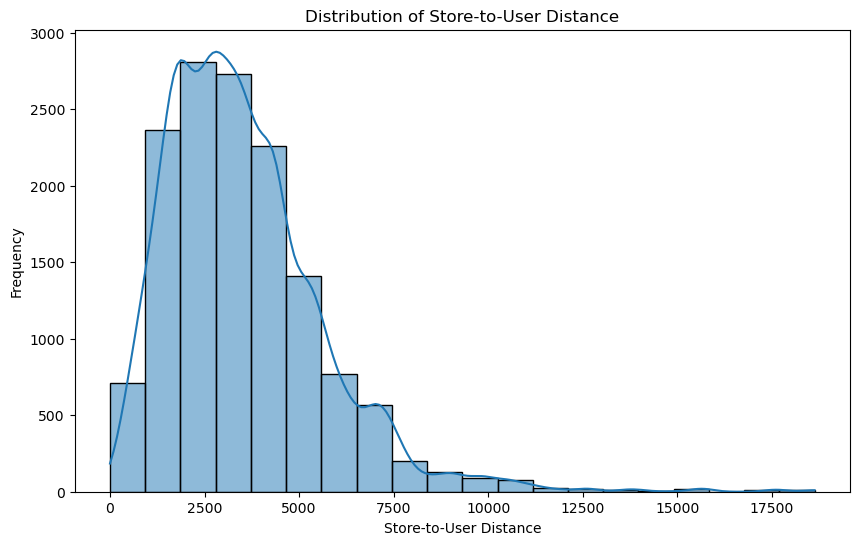

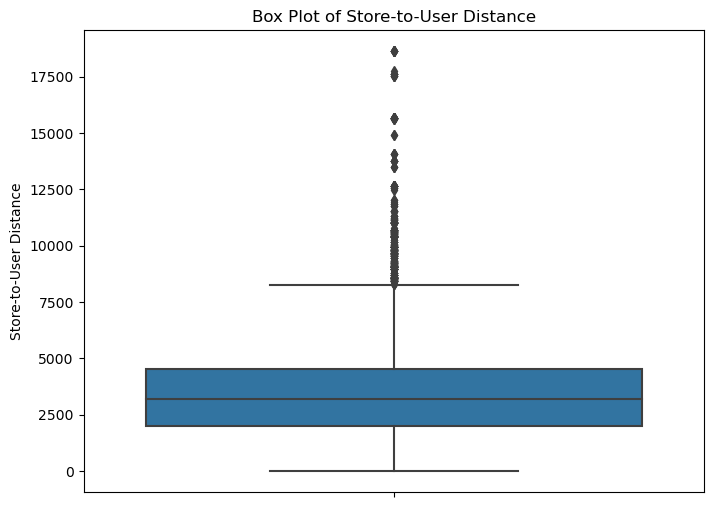

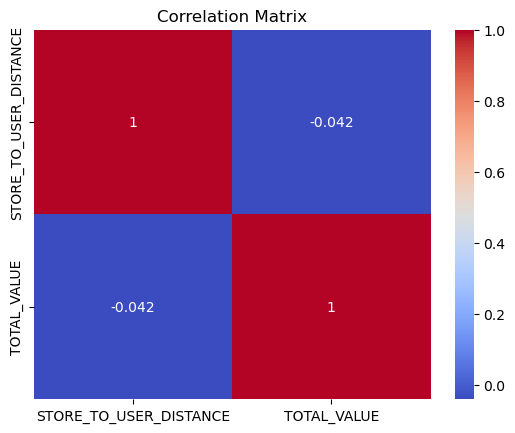

In [49]:
distance_summary = df_orders['STORE_TO_USER_DISTANCE'].describe()
print(distance_summary)

# Histogram and density plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df_orders, x='STORE_TO_USER_DISTANCE', bins=20, kde=True)
plt.title('Distribution of Store-to-User Distance')
plt.xlabel('Store-to-User Distance')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_orders, y='STORE_TO_USER_DISTANCE')
plt.title('Box Plot of Store-to-User Distance')
plt.ylabel('Store-to-User Distance')
plt.show()

# Correlation analysis (if you have other variables)
# For example, if you have 'TOTAL_VALUE' column in df_orders
correlation_matrix = df_orders[['STORE_TO_USER_DISTANCE', 'TOTAL_VALUE']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()s